<a href="https://colab.research.google.com/github/atharv-arya/pytorch-practice-core-concepts-/blob/main/PyTorch_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Tensor Basics (Create, Operations, NumPy, GPU Support)

* Everything in pytorch is based on tensor operations. *Tensors* are multi dimensional matrix containing elements of a single data type


In [1]:
import torch

In [ ]:
# torch.empty(size): uninitialized
x = torch.empty(1) # scalar
print("empty(1): ", x)

x = torch.empty(3) # vector
print("empty(3): ", x)

x = torch.empty(2,3) # matrix
print("empty(2,3): ", x)

x = torch.empty(5,2,3) # tensor, 3 dimensions. (5,2,3) means 5 blocks where each block will have 2 rows and 3 cols
# x = torch.empty(2,2,2,3) # tensor, 4 dimensions
print("empty(5,2,3): ", x)

# torch.rand(size): random numbers between 0 and 1
x = torch.rand(5, 3)
print("rand(5,3): ", x)

# torch.zeros(size), fill with 0
# torch.ones(size), fill with 1
x = torch.zeros(5, 3)
print("zeros(5,3): ", x)

empty(1):  tensor([9.1998e-20])
empty(3):  tensor([1.9506e-19, 0.0000e+00, 1.6094e-19])
empty(2,3):  tensor([[8.7324e-33, 4.3519e-41, 7.8755e-22],
        [0.0000e+00, 0.0000e+00, 1.0083e-08]])
empty(5,2,3):  tensor([[[1.9513e-19, 0.0000e+00, 8.7323e-33],
         [4.3519e-41, 8.9683e-44, 0.0000e+00]],

        [[1.1210e-43, 0.0000e+00, 1.7993e-19],
         [0.0000e+00, 7.3449e-23, 0.0000e+00]],

        [[0.0000e+00, 6.5453e-02, 4.6243e-44],
         [0.0000e+00, 1.6094e-19, 0.0000e+00]],

        [[1.6084e-19, 0.0000e+00, 1.7937e-43],
         [0.0000e+00, 1.1210e-43, 0.0000e+00]],

        [[1.7993e-19, 0.0000e+00, 1.5835e-43],
         [0.0000e+00, 1.9506e-19, 0.0000e+00]]])
rand(5,3):  tensor([[0.5903, 0.3975, 0.6959],
        [0.3997, 0.7536, 0.6284],
        [0.1674, 0.1403, 0.5719],
        [0.2375, 0.9993, 0.2764],
        [0.3150, 0.8769, 0.6324]])
zeros(5,3):  tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
# check size
print("size", x.size())
print("shape", x.shape)
# to access the first element
print("First element: ", x.size(0))
print("First element: ", x.shape[0])

size torch.Size([5, 3])
shape torch.Size([5, 3])
First element:  5
First element:  5


In [ ]:
# check data type
print(x.dtype)

# specifiy types, float32 default
x = torch.zeros(5,3, dtype=torch.float16)
print(x)

# check type
print(x.dtype)

torch.float32
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)
torch.float16


In [ ]:
# we can construct tensors from data
x = torch.tensor([5.5, 3])
print(x, x.dtype)

tensor([5.5000, 3.0000]) torch.float32


In [ ]:
# requires_grad -> is an argument. Default is set to false
# this tells pytorch to calculate the gradients for the specific tensor
# gets used later in the optimization steps
# used for all variables in our model that we want to optimize

x = torch.tensor([5.5, 3], requires_grad = True)
print(x)

tensor([5.5000, 3.0000], requires_grad=True)


## Operations with Tensor

In [ ]:
# Operations
x = torch.ones(2,2)
y = torch.rand(2,2)

# element wise addition
z = x + y
# can use -> torch.add(x,y) also

# y.add_(x) -> in place addition, everything with a trailing underscore is an inplace operation
# that is it will modify the variable, no new tensor will be created

print(x)
print(y)
print(z)

tensor([[1., 1.],
        [1., 1.]])
tensor([[0.5697, 0.0179],
        [0.7951, 0.1045]])
tensor([[1.5697, 1.0179],
        [1.7951, 1.1045]])


In [ ]:
# subtracton
z = x - y
z = torch.sub(x,y)

# multiplication
z = x * y
z = torch.mul(x,y)

# divison
z = x/y
z = torch.div(x,y)

In [ ]:
# Slicing
x = torch.rand(5,3)
print(x)
print("x[:, 0]", x[:,0]) # all rows, col 0
print("x[1, :]", x[1, :]) # row 1, all cols
print("x[1,1]", x[1,1]) # element at row 1, col 1

# get the actual value if only 1 element in your tensor
print("x[1,1].item()", x[1,1].item())

tensor([[0.1234, 0.0506, 0.0082],
        [0.4010, 0.6034, 0.9507],
        [0.5255, 0.3889, 0.9832],
        [0.8436, 0.6132, 0.6376],
        [0.5885, 0.0509, 0.8181]])
x[:, 0] tensor([0.1234, 0.4010, 0.5255, 0.8436, 0.5885])
x[1, :] tensor([0.4010, 0.6034, 0.9507])
x[1,1] tensor(0.6034)
x[1,1].item() 0.6034088730812073


In [ ]:
# Reshape with torch.view()
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # the size -1 is inferred from other dimensions, if -1 is used, pytorch automatically determines the necessary size
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


## NumPy
Converting a torch tensor to numpy or vice versa

In [ ]:
# Torch Tensor -> NumPy

a = torch.ones(5)
print (a)

# torch to numpy using -> .numpy()
b = a.numpy()
print(b)
print(type(b)) # b will be converted to a numpy array

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [ ]:
# CAREFUL: If the tensor is on the CPU (not the GPU),
# and then is converted to a numpy array, both objects will
# share the same memory location, so changing one will also change the other
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [ ]:
# NumPy -> Torch Tensor

# numpy array to tensor using -> torch.from_numpy(x) or torch.tensor(x)
import numpy as np

a = np.ones(5)
b = torch.from_numpy(a) # using .from_numpy(a) -> a and b share the same memory location
c = torch.tensor(a) # using torch.tensor(a) -> c creates a new tensor all together and is stored in a different memory loc
print(a)
print(b)
print(c)

# So now when we modify a:
# b will get modified too as they share the same memory loc.
# But c will not get modified as it was created in a new memory location
a += 1
print(a)
print(b) # gets modified
print(c) # not modified

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


## GPU Support
By default all tensors are created on CPU. But we can also move them to the GPU (if it's available), or create a tensor directly on the GPU.

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

x = torch.rand(2,2).to(device) # moves tensors to GPU device. Less efficient as you have to first create them on CPU and then move them to the GPU
# x = x.to('cpu')
# x = x.to('cuda')

x = torch.rand(2,2, device = device) # creates tensors directly on the GPU. More effeicient as you create them directly on the GPU

In [3]:
device

device(type='cuda')

# 2. Autograd
The autograd package provides automatic differentiation for all operations on Tensors. Generally speaking, torch.autograd is an engine for computing the vector-jacobian product. It computes partial derivates while applying the chain rule.

Set ``` requires_grad = True ```











In [1]:
import torch

# requires_grad = True -> tracks all operations on the tensor.
x = torch.randn(3, requires_grad=True)
y = x + 2

# y was created as a result of an operation, so it has a grad_fn attribute.
# grad_fn: references a Function that has created the Tensor
print(x) # created by the user -> grad_fn is None
print(y)
print(y.grad_fn)

tensor([0.3117, 0.7360, 1.5499], requires_grad=True)
tensor([2.3117, 2.7360, 3.5499], grad_fn=<AddBackward0>)


In [2]:
# do more operations on y
z = y * y * 3
print(z)

z = z.mean()
print(z)

tensor([16.0324, 22.4578, 37.8060], grad_fn=<MulBackward0>)
tensor(25.4321, grad_fn=<MeanBackward0>)


In [3]:
# Let's compute the gradients with backpropgation
# when we finish our computation we can call .backward() and have all the gradients computed automatically.
# The gradients for this tensor will be accumulated into .grad attribute.
# It is the partial derivate of the function w.r.t the tensor

print(x.grad)
z.backward()
print(x.grad) # dz/dx

# !!! Careful!!! backward() accumulates the gradient for this tensor into .grad attribute.
# !!! We need to careful during optimization !!! optimizer.zero_grad

None
tensor([4.6235, 5.4721, 7.0999])


## Stop a tensor from tracking history:
Soemtimes we don't want the tracking to be done for a tensor. For example during the training loop when we want to update our weihts, or after training during evaluation. These operations should not be part of the gradient computation. To prevent this, we can use:
* x.requires_grad_(False)
* x.detach()
* wrap in with torch.no_grad()

In [4]:
# .requires_grad(True/False) -> changes an existing flag in-place
a = torch.randn(2,2)
b = (a * a).sum()
print(a.requires_grad) # by default requirs_grad is False
print(b.grad_fn)

a.requires_grad_(True)
b = (a * a).sum()
print(a.requires_grad)
print(b.grad_fn)

False
None
True


In [5]:
# .detach(): get a new Tensor with the same content but no gradient computation:
a = torch.randn(2,2, requires_grad=True)
b = a.detach()
print(a.requires_grad)
print(b.requires_grad)

True
False


In [6]:
# wrap in 'with torch.no_grad():'
a = torch.randn(2,2, requires_grad=True)
print(a.requires_grad)
with torch.no_grad():
  b = a ** 2
  print(b.requires_grad)

True
False


## Gradient Descent Autograd

Linear Regression Example: ```f(x) = w*x + b```

here: ```f(x) = 2 * x```

In [15]:
import torch

X = torch.tensor([1,2,3,4,5,6,7,8], dtype=torch.float32)
Y = torch.tensor([2,4,6,8,10,12,14,16], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
  return w * x

# loss = MSE
def loss(y, y_pred):
  return ((y_pred - y)**2).mean()


X_test = 5
print(f'Prediction before training: f({X_test}) = {forward(X_test).item():.3f}')

Prediction before training: f(5) = 0.000


In [19]:
# Training
learning_rate = 0.01
n_epochs = 100

for epoch in range(n_epochs):
  # predict = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # calculate gradients = backward pass
  l.backward() # dl/dw

  # update weights
  # w.data = w.data - learning * w.grad
  with torch.no_grad():
    w -= learning_rate * w.grad

  # zero the gradients after pushing -> we need to remember to empty the gradients before the next iterations
  w.grad.zero_()

  if (epoch+1) % 10 == 0:
    print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.3f}')

print(f'Prediction after training: f({X_test}) = {forward(X_test).item():.3f}')


epoch 10: w = 2.000, loss = 0.000
epoch 20: w = 2.000, loss = 0.000
epoch 30: w = 2.000, loss = 0.000
epoch 40: w = 2.000, loss = 0.000
epoch 50: w = 2.000, loss = 0.000
epoch 60: w = 2.000, loss = 0.000
epoch 70: w = 2.000, loss = 0.000
epoch 80: w = 2.000, loss = 0.000
epoch 90: w = 2.000, loss = 0.000
epoch 100: w = 2.000, loss = 0.000
Prediction after training: f(5) = 10.000


# 3. Model, Loss & Optimizer

A typical PyTorch pipeline (input, output, forward pass with different layers)
1. Design model (input, output, forward pass with different layers)
2. Construct loss and optimizer
3. Training loop:
    * Forward = compute prediction and loss
    * Backward = compute gradients
    * Update weights





In [2]:
import torch
import torch.nn as nn

# Linear regression using PyTorch built in functions
# f(x) = w * x
# here: f(x) = 2 * x


# 0) Training samples, watch the shape
# Pytorch built in function require the input to be in a specific way hence the values are inside a double list
X = torch.tensor([[1], [2], [3], [4], [5], [6], [7], [8]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8], [10], [12], [14], [16]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'n_samples: {n_samples}, n_features: {n_features}')

# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

n_samples: 8, n_features: 1


In [19]:
# 1) Design Model, the model has to implement the forward pass!

# Here we could simply use a built-in model from PyTorch
# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    # define different layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

input_size, output_size = n_features, n_features
model = LinearRegression(input_size, output_size)
print(f'Prediction before training: f({X_test.item()}) = {model(X_test).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
n_epochs = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 3) Training Loop
for epoch in range(n_epochs):
  # predict = forward pass with our model
  y_pred = model(X)

  # loss
  l = loss(Y, y_pred)

  # calculate gradients = backward pass
  l.backward()

  # update weights
  optimizer.step()

  # empyty the gradients/make the gradients, zero after updating the weights
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    w, b = model.parameters() # unpacking the params
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l.item():.3f}')

print(f'Prediction after training: f({X_test.item()}) = {model(X_test).item():.3f}')

Prediction before training: f(5.0) = 3.592
epoch 10: w = 1.950, loss = 0.016
epoch 20: w = 1.953, loss = 0.014
epoch 30: w = 1.955, loss = 0.013
epoch 40: w = 1.957, loss = 0.012
epoch 50: w = 1.958, loss = 0.011
epoch 60: w = 1.960, loss = 0.010
epoch 70: w = 1.962, loss = 0.010
epoch 80: w = 1.963, loss = 0.009
epoch 90: w = 1.965, loss = 0.008
epoch 100: w = 1.966, loss = 0.008
torch.Size([1, 1])
1.965943694114685
Prediction after training: f(5.0) = 10.021


# 4. First Neural Net
GPU, Datasets, DataLoader, Transforms, Neural Net, Training & Evaluation

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 504kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.63MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.5MB/s]


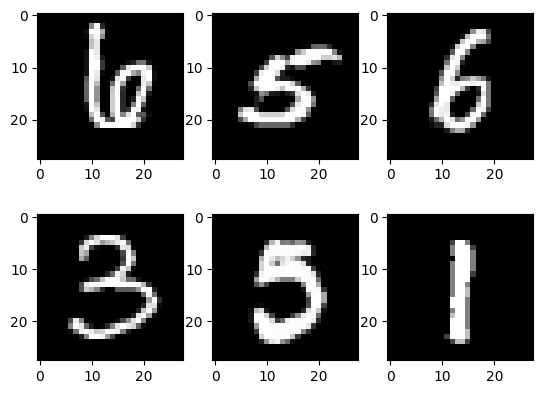

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-params
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform = transforms.ToTensor(),# converts the image type to tensor automatically
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=False,
                                           transform = transforms.ToTensor())

# Data loader -> A DataLoader is used to efficiently load data in mini-batches (with optional shuffling)
#                for training or testing a model.
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [3]:
# Creating the model pipeline
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    # no activation and no softmax at the end and also the cross entropy loss defined below expects raw values for calculating
    return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss() # using cross entropy loss as this is a multiclass classification problem
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs): # first for loop iterates over the number of epochs we want to run the training loop for
  for i, (images, labels) in enumerate(train_loader): # second for loop runs for the train_loader to
   # origin shape: [100,1,28,28]                      # get the training data in an optimized way
   # resized: [100, 784]
   images = images.reshape(-1, 28*28).to(device)
   labels = labels.to(device)

   # Forward pass and loss calculation
   outputs = model(images) # outputs is nothing but basically the y_pred
   loss = criterion(outputs, labels) # and here the loss is being calculated between outputs(y_pred) and labels that is nothign but Y

   # Backward pass and optimize
   loss.backward()
   optimizer.step()
   optimizer.zero_grad()

   if (i+1) % 100 == 0:
    print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')



Epoch [1/2], Step [100/600], Loss: 0.3462
Epoch [1/2], Step [200/600], Loss: 0.3116
Epoch [1/2], Step [300/600], Loss: 0.2634
Epoch [1/2], Step [400/600], Loss: 0.2275
Epoch [1/2], Step [500/600], Loss: 0.1490
Epoch [1/2], Step [600/600], Loss: 0.1440
Epoch [2/2], Step [100/600], Loss: 0.1007
Epoch [2/2], Step [200/600], Loss: 0.0855
Epoch [2/2], Step [300/600], Loss: 0.0935
Epoch [2/2], Step [400/600], Loss: 0.0703
Epoch [2/2], Step [500/600], Loss: 0.1435
Epoch [2/2], Step [600/600], Loss: 0.1197


In [4]:
# Test the model: we no longer need need to compute gradients
with torch.no_grad():
  n_correct = 0
  n_samples = len(test_loader.dataset)

  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)

    # max returns (output values, index)
    _, predictions = torch.max(outputs, 1)
    n_correct += (predictions == labels).sum().item()

  acc = n_correct / n_samples
  print(f'Accuracy of the network on the {n_samples} test images: {100*acc} %')

Accuracy of the network on the 10000 test images: 97.15 %


# 5. CNN

We will see:
* Convolutional Layers
* MaxPooling
* Save/Load model



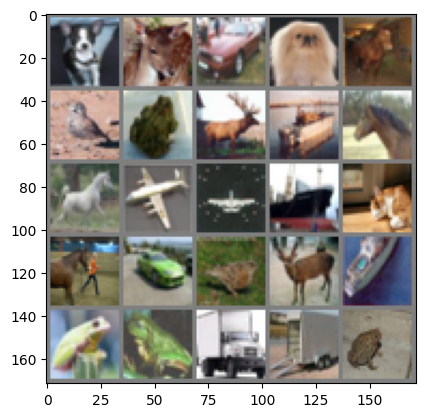

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper params
num_epochs = 10
batch_size = 32
learning_rate = 0.001

# dataset has PILImage images of range [0,1]
# we transform them to tensors of normalized range [-1,1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32*32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data',
                                             train=True,
                                             download=True,
                                             transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data',
                                            train=False,
                                            download=True,
                                            transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(imgs):
    imgs = imgs / 2 + 0.5  # unnormalize
    npimg = imgs.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# one batch of random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
imshow(img_grid)


In [4]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3,32,3) # 3 -> input size, 32 -> output size -> 32, 3 -> kernel size
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(32, 64, 3) # input size of the Conv2 layer should be = to output size of Conv1 layer, hence input here is 32
    self.conv3 = nn.Conv2d(64, 64, 3)
    self.fc1 = nn.Linear(64*4*4, 64)
    self.fc2 = nn.Linear(64, 10)

  def forward(self, x):
    # N ,3, 32, 32 -> this is the input shape of x. N -> batch size, 3 -> color channels(R,G,B), (32,32)-> img size

    x = F.relu(self.conv1(x)) # output of this layer -> N, 32, 30, 30
    x = self.pool(x)          # output of this layer -> N, 32, 15, 15
    x = F.relu(self.conv2(x)) # output of this layer -> N, 64, 13, 13
    x = self.pool(x)          # output of this layer -> N, 64, 6, 6
    x = F.relu(self.conv3(x)) # output of this layer -> N, 64, 4, 4
    x = torch.flatten(x, 1)   # output of this layer -> N, 1024
    x = F.relu(self.fc1(x))   # output of this layer -> N, 64
    x = self.fc2(x)           # output of this layer -> N, 10
    return x

model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  running_loss = 0.0

  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print(f'[{epoch+1}], Loss: {running_loss/n_total_steps:.3f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

[1], Loss: 1.473
[2], Loss: 1.091
[3], Loss: 0.924
[4], Loss: 0.820
[5], Loss: 0.745
[6], Loss: 0.688
[7], Loss: 0.634
[8], Loss: 0.595
[9], Loss: 0.558
[10], Loss: 0.518
Finished Training


In [6]:
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(PATH)) # it takes the loaded dictionary, not the path file itself
loaded_model.to(device)
loaded_model.eval()

with torch.no_grad():
  n_correct = 0 # this is will used for calculating the acc with the model defined above
  n_correct2 = 0 # this is will used for calculating the acc with the loaded model
  n_samples = len(test_loader.dataset)

  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images) # using the model defined above here

    # max returns (value, index)
    _, predicted = torch.max(outputs, 1)
    n_correct += (predicted == labels).sum().item()

    outputs2 = loaded_model(images) # using the loaded model here
    _, predicted2 = torch.max(outputs2, 1)
    n_correct2 += (predicted2 == labels).sum().item()

  acc = n_correct / n_samples
  print(f'Accuracy of the model: {100*acc} %')

  acc2 = n_correct2 / n_samples
  print(f'Accuracy of the loaded model: {100*acc2} %')

Accuracy of the model: 72.41 %
Accuracy of the loaded model: 72.41 %
